## <center>Model</center>

In [57]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import *

In [58]:
# data Import

data_import = pd.read_csv("./clean_data.csv")
data_import

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Avg Salary,Same place,age,Python,Power bi,Excel,Aws,Title,position,num_compi
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,Albuquerque,Goleta,501 to 1000 employees,1973,Company - Private,...,72.0,0,49,1,1,1,0,Data Scientist,na,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,Linthicum,Baltimore,10000+ employees,1984,Other Organization,...,87.5,0,38,1,0,0,0,Data Scientist,na,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,Clearwater,Clearwater,501 to 1000 employees,2010,Company - Private,...,85.0,1,12,1,0,1,0,Data Scientist,na,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,Richland,Richland,1001 to 5000 employees,1965,Government,...,76.5,1,57,1,0,0,0,Data Scientist,na,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,New York,New York,51 to 200 employees,1998,Company - Private,...,114.5,1,24,1,0,1,0,Data Scientist,na,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,Cambridge,"Brentford, United Kin",10000+ employees,1830,Company - Public,...,84.5,0,192,0,0,0,1,na,Senior,3
738,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,Nashville,San Francisco,1001 to 5000 employees,2006,Company - Public,...,102.5,0,16,1,0,0,1,Data Engineer,Senior,3
739,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,Pittsburgh,Pittsburgh,501 to 1000 employees,1984,College / University,...,73.5,1,38,0,0,1,0,na,na,0
740,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC",Allentown,Chadds Ford,1 to 50 employees,-1,Company - Private,...,127.5,0,2023,0,0,1,0,Manager,na,0


In [59]:
data = data_import.copy()

- Choosing Relevant Columns
- Get Dummy Data
- Train Test Split
- Multiple LR
- Random Forest
- Pred and Error

In [60]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per hour', 'Min Salary', 'Max Salary', 'Avg Salary', 'Same place',
       'age', 'Python', 'Power bi', 'Excel', 'Aws', 'Title', 'position',
       'num_compi'],
      dtype='object')

In [61]:
# Choosing Relevant Columns

cols = [ 'Rating','Size','Location',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Same place',
       'age', 'Python', 'Power bi', 'Excel', 'Aws', 'Title', 'position','num_compi',  'Avg Salary']

In [62]:
model_data = data[cols]
model_data.head()

,Rating,Size,Location,Type of ownership,Industry,Sector,Revenue,Same place,age,Python,Power bi,Excel,Aws,Title,position,num_compi,Avg Salary
0,3.8,501 to 1000 employees,Albuquerque,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,49,1,1,1,0,Data Scientist,na,0,72.0
1,3.4,10000+ employees,Linthicum,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,38,1,0,0,0,Data Scientist,na,0,87.5
2,4.8,501 to 1000 employees,Clearwater,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,12,1,0,1,0,Data Scientist,na,0,85.0
3,3.8,1001 to 5000 employees,Richland,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),1,57,1,0,0,0,Data Scientist,na,3,76.5
4,2.9,51 to 200 employees,New York,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,24,1,0,1,0,Data Scientist,na,3,114.5


categorical to num

In [63]:
# get dummies

dummies = pd.get_dummies(data = model_data)
dummies.head()

,Rating,Same place,age,Python,Power bi,Excel,Aws,num_compi,Avg Salary,Size_-1,...,Revenue_Unknown / Non-Applicable,Title_Data Analyst,Title_Data Engineer,Title_Data Scientist,Title_ML Engineer,Title_Manager,Title_na,position_Junior,position_Senior,position_na
0,3.8,0,49,1,1,1,0,0,72.0,0,...,0,0,0,1,0,0,0,0,0,1
1,3.4,0,38,1,0,0,0,0,87.5,0,...,0,0,0,1,0,0,0,0,0,1
2,4.8,1,12,1,0,1,0,0,85.0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.8,1,57,1,0,0,0,3,76.5,0,...,0,0,0,1,0,0,0,0,0,1
4,2.9,1,24,1,0,1,0,3,114.5,0,...,1,0,0,1,0,0,0,0,0,1


Getting X and Y(target) variables

In [64]:
X = dummies.drop('Avg Salary', axis =1)
y = dummies['Avg Salary']

In [65]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((593, 331), (149, 331), (593,), (149,))

stats model for analysis

In [67]:
import statsmodels.api as sm

const = sm.add_constant(X_train)

results = sm.OLS(y_train, const).fit()

In [68]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Avg Salary   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     5.814
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           3.29e-49
Time:                        16:18:25   Log-Likelihood:                -2503.2
No. Observations:                 593   AIC:                             5514.
Df Residuals:                     339   BIC:                             6628.
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Linear regression

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr,X_train, y_train,scoring = 'neg_mean_absolute_error', cv = 3).mean()

-24.477602626386737

here cross validation error is high 

Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf,X_train, y_train,scoring = 'neg_mean_absolute_error', cv = 3).mean()

-15.804018138472523

here cross validation error is less

Lets predict from both linear Regression and Random forest Regression

In [73]:
y_pred_lr = lr.predict(X_test)
 
y_pred_rf = rf.predict(X_test)

Lets check error for both models

In [87]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_lr)

2983218826.4481564

error is large makes sense as there are more 0 and 1 values 

In [75]:
mean_absolute_error(y_test, y_pred_rf)

10.766045995670996

Mean Absolute error of Random Forest regressor is less

Lets see original and predicted salary for Random Forest Regression

In [88]:
# Original salary

y_test.head()

659     87.0
569     97.0
153    109.5
19      87.5
405     66.5
Name: Avg Salary, dtype: float64

In [89]:
# Predicted Salary

list(y_pred_rf[:5])

[94.0375, 117.98654761904763, 98.54, 99.16, 63.595]

<AxesSubplot:xlabel='Avg Salary'>

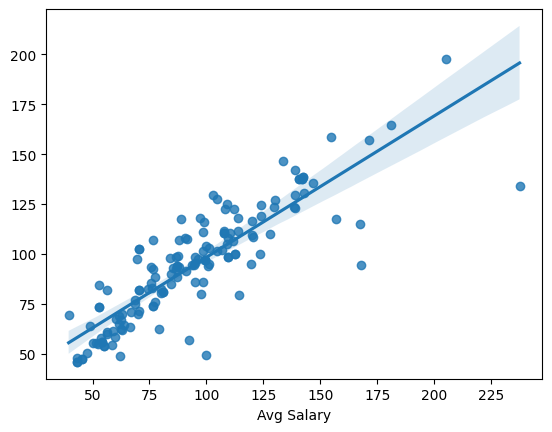

In [93]:
sns.regplot(x = y_test, y = y_pred_rf)

## Thank You